DO NOT IMPORT WHILE MEASUREMENT RUNNING

In [5]:
import matplotlib.pyplot as plt

path_essentials = 'user_scripts/Timo/from_Simon/script_logic_essentials.py'
#path_toolkit = 'jupyter/Timo/own/logic_toolkit.py'
path_curdir = 'user_scripts/Timo/own/'

# import essentials via run
exec(open(path_essentials).read())
#exec(open(path_toolkit).read())
# usual module imports
sys.path.append(path_curdir)
0

0

## Settings

In [128]:
#laser_off(pulser_on=False) # turn out nicard laser_on 

t_analyse_start = 1110e-9   #0e-6#1.09e-6
savepath, fname = None, None
savepath = r"E:/Data/2023/10/20231023/"
fname = r"Rabi_green=120mW_doubleNV_read_opt_tana_680LP.txt"
#fname = "550+638_1x700LPHQ_red=40mW_opt_tana.2.txt"


inpath = "C:/Data/2021/0/20210127/"
#in_fname = "rabi_532_607_aom=8.92_3_opt_tana.txt"
#t_mes = 790.8626000881195   # from corresponding saved qudi pulsed .dat file

#savepath + "   " + fname

## Optimize t_analyse during measurement

Run twice to avoid bad first datapoint!

In [134]:
t_analyse = np.linspace(0.075e-6, 0.6e-6, 50)

contr = []
phots = []
db = []
t_mes = []


def calc_snr(contr, phots):
    
    signal = np.asarray(contr)/100 * np.asarray(phots)
    noise = np.sqrt(np.asarray(phots))
    snr_best = np.argmax(signal/noise)
    t_max_snr = t_analyse[np.argmax(signal/noise)]*1e6
    idx_max_snr = np.argmax(signal/noise)
    
    return signal, noise, snr_best, t_max_snr, idx_max_snr 
    
def calc_eta(signal, noise, t_mes):
    eta = 1/(signal/noise)*np.sqrt(t_mes)
    t_eta_min = t_analyse[np.argmin(eta)]*1e6
    eta_min = np.min(eta)
    
    return eta, t_eta_min, eta_min

try:
    pulsedmasterlogic.toggle_pulsed_measurement_pause(True)

    for t in t_analyse:
        analy_method = {'method': 'sum', 'signal_start': t_analyse_start, 'signal_end': t_analyse_start+float(t)}
        pulsedmasterlogic.set_analysis_settings(analy_method)
        pulsedmeasurementlogic.manually_pull_data()
        # podmr
        #_, res = pulsedmeasurementlogic.do_fit('lor_dip')
        _, res = pulsedmeasurementlogic.do_fit('sine')
        phots_avg = np.average(pulsedmeasurementlogic.signal_data[1])
        phots_sum = np.sum(pulsedmeasurementlogic.signal_data[1])

        #db.append(res.result_str_dict['Position']['error'])
        contr.append(res.result_str_dict['Contrast']['value'])
        phots.append(phots_avg)

    t_mes = pulsedmeasurementlogic._get_raw_data()[1]['elapsed_time']  # better: n_sweeps but atm not available
    pulsedmasterlogic.toggle_pulsed_measurement_pause(False)

    # set best t for best eta
    signal, noise, snr_best, t_max_snr, idx_max_snr = calc_snr(contr, phots)
    eta, t_eta_min, eta_min = calc_eta(signal, noise, t_mes)



    analy_method = {'method': 'sum', 'signal_start': t_analyse_start, 'signal_end': t_analyse_start+float(t_max_snr)/1e6}
    pulsedmasterlogic.set_analysis_settings(analy_method)
except:
    logger.exception("")


In [29]:
pulsedmasterlogic.toggle_pulsed_measurement_pause(False)


## load from txt

In [45]:
data = np.loadtxt(inpath + "\\" + in_fname) 
# t_ana (s), phots (cts), contr (%), snr
t_analyse = data[0,:]
phots = data[1,:]
contr = data[2,:]

## Plot and save

In [73]:

0

In [38]:
contr[idx_max_snr]

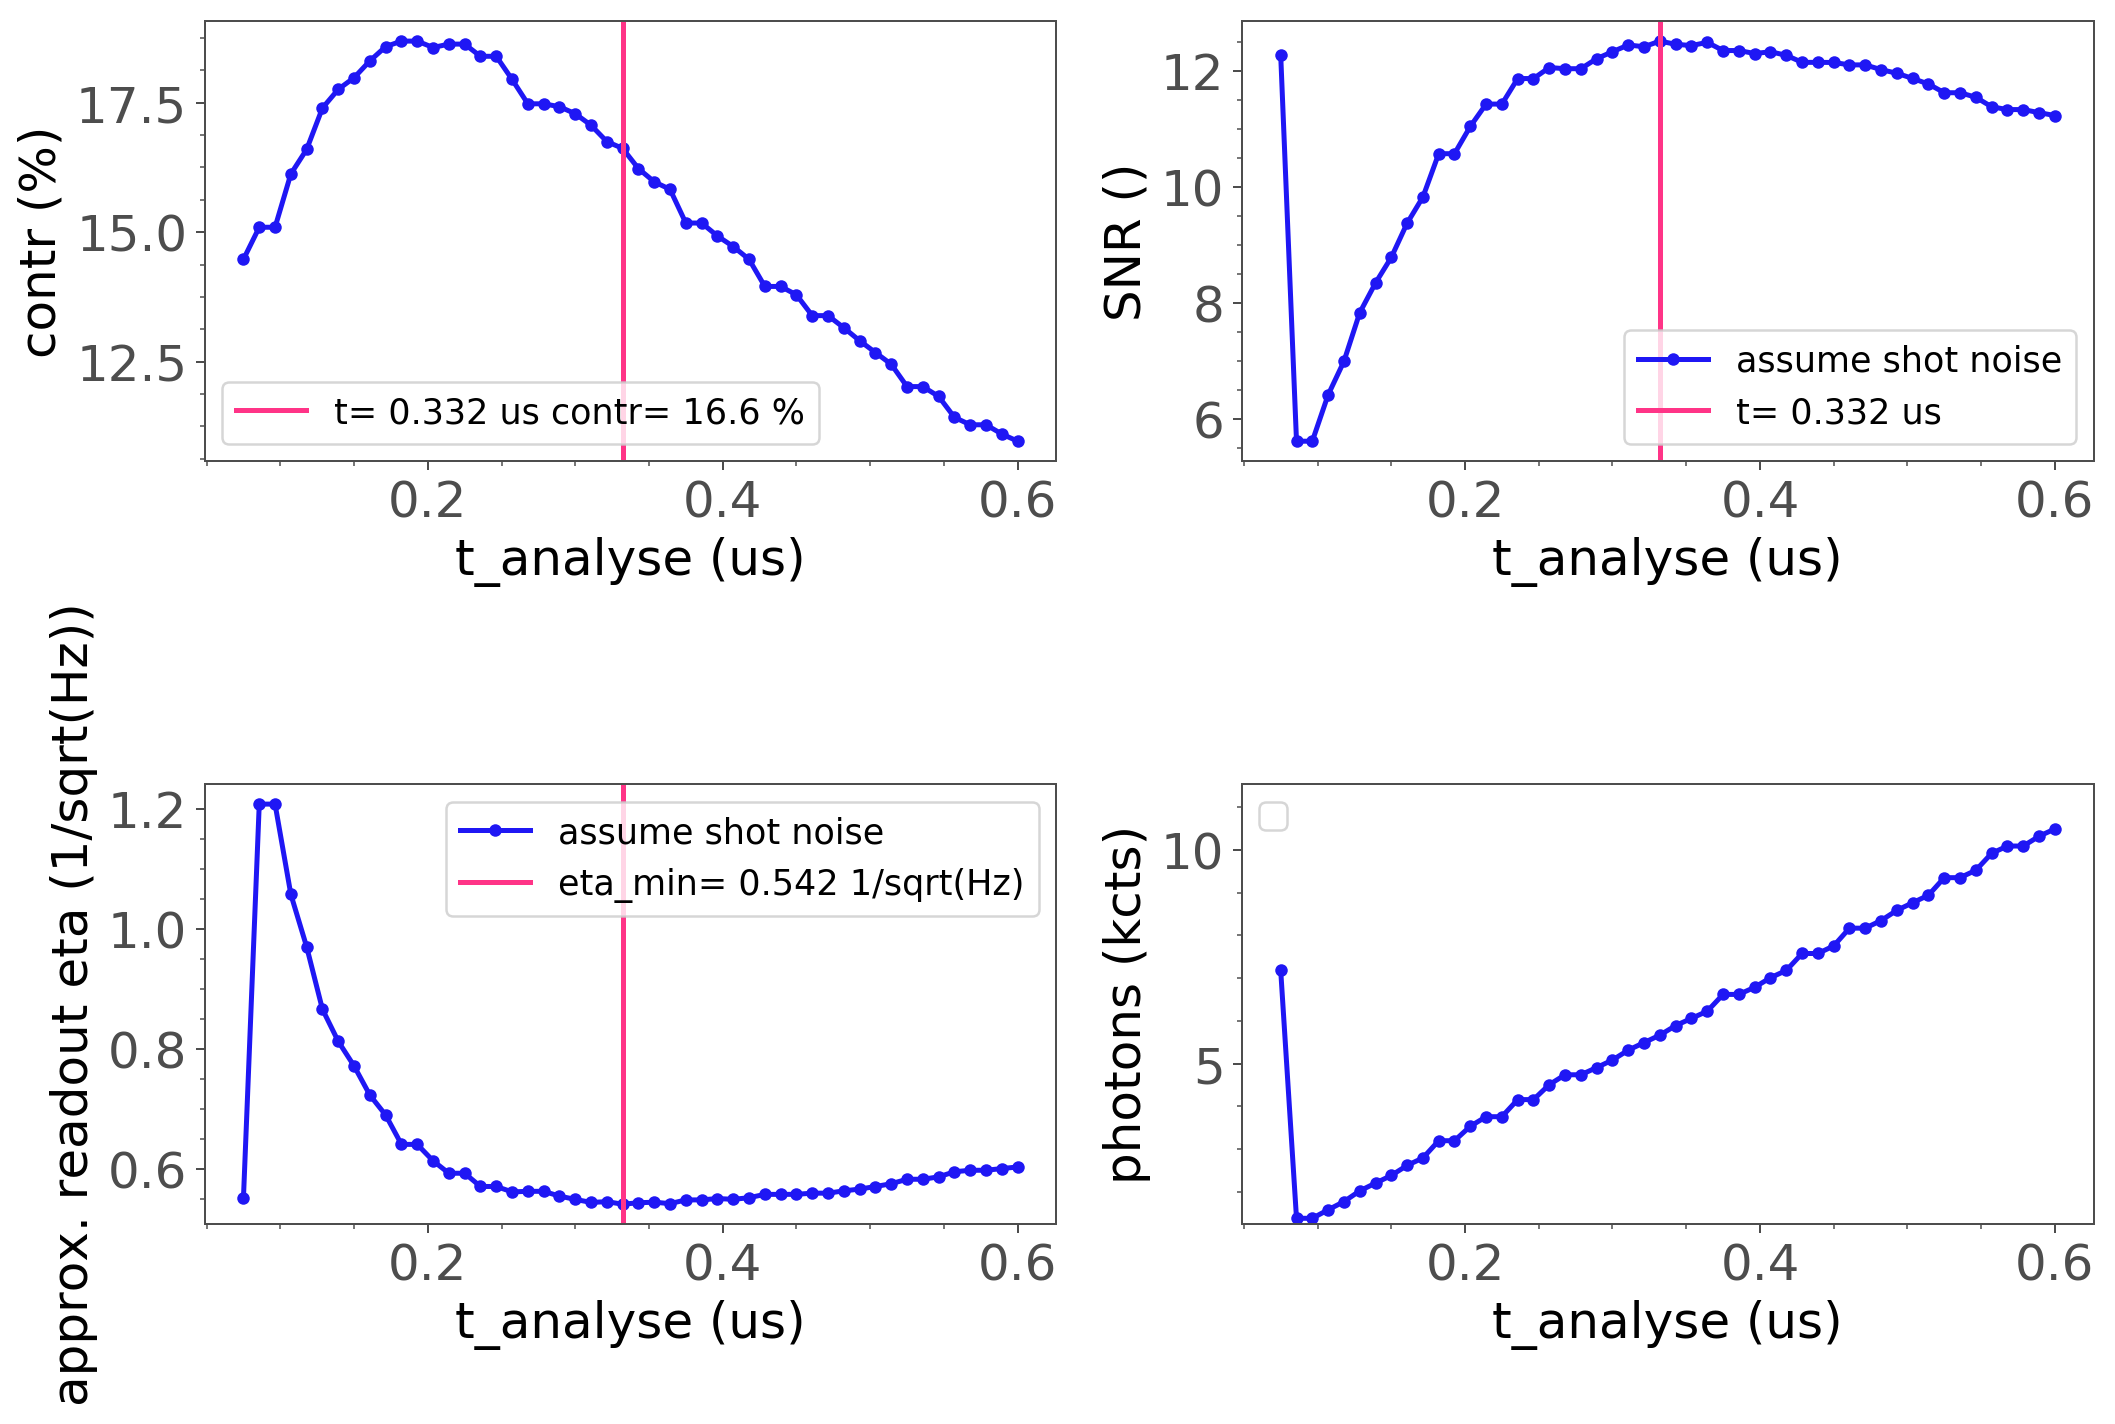

In [137]:
#t_analyse = np.linspace(5e-6, 200e-6, 50)
#contr = [1.2084316261009678,1.2084316261009678,1.6100488328975526,1.7205450845010684,1.7406619128510885,1.73665370948666,1.6930838603507814,1.6690342243571803,1.7008050849324214,1.6537221462835454,1.5588755622951846,1.525972354331993,1.4795560655067466,1.4509341542026646,1.430500536229678,1.430500536229678,1.415723499100956,1.3814693308740214,1.3599037059771801,1.327375682050967,1.3142459265169621,1.277355437478395,1.258461731433579,1.2412351680621043,1.2315678269968504,1.2207942268373415,1.2043988656577238,1.1778415704006433,1.1399082389224442,1.111545878070097,1.0861955341950085,1.067207421770278,1.0500666137892656,1.0476253473643697,1.039678812075893,1.0342626535900368,1.026820791471816,1.0027225382283957,0.9828370327653284,0.950167885929056,0.9342871488155898,0.930806188454655,0.9263990495807786,0.9079210628278421,0.8992865363187404,0.8856565437647932,0.8643549466349151,0.851893835748797,0.8299254281150593,0.8081377541573216]
#phots = [77821.4,77821.4,135942.96,192146.62,246539.76,299550.98,352897.94,403544.04,453246.5,502135.5,550283.18,597752.12,644733.9,691315.06,783280.1,783280.1,828705.74,875311.52,920169.02,964802.78,1009201.92,1053375.48,1097333.36,1141137.16,1184816.46,1228301.1,1271632.46,1314816.06,1359183.56,1402101.5,1444932.48,1487627.5,1530146.82,1572661.48,1615016.82,1657227.42,1699376.0,1741384.86,1783371.46,1826625.0,1868437.26,1910132.72,1951749.54,1993281.9,2034792.92,2076264.32,2117652.94,2158965.74,2200232.26,2241357.6]
try:
    signal, noise, snr_best, t_max_snr, idx_max_snr = calc_snr(contr, phots)
    eta, t_eta_min, eta_min = calc_eta(signal, noise, t_mes)

    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(t_analyse*1e6, contr)
    plt.axvline(t_max_snr, label='t= {:.3f} us contr= {:.1f} %'.format(t_max_snr, contr[idx_max_snr]), color='C2')
    plt.xlabel("t_analyse (us)")
    plt.ylabel("contr (%)")
    plt.legend()

    plt.subplot(222)
    plt.plot(t_analyse*1e6, signal/noise, label="assume shot noise")
    plt.xlabel("t_analyse (us)")
    plt.ylabel("SNR ()")

    plt.axvline(t_max_snr, label='t= {:.3f} us'.format(t_max_snr), color='C2')
    plt.legend()
    plt.legend()


    plt.subplot(223)

    plt.plot(t_analyse*1e6, eta, label="assume shot noise")
    plt.xlabel("t_analyse (us)")
    plt.ylabel("approx. readout eta (1/sqrt(Hz))")

    plt.axvline(t_eta_min, label='eta_min= {:.3f} 1/sqrt(Hz)'.format(eta_min), color='C2')
    plt.legend()


    plt.subplot(224)
    #"""
    cts = np.asarray(phots)
    plt.plot(t_analyse*1e6, cts/1e3)
    plt.xlabel("t_analyse (us)")
    plt.ylabel("photons (kcts)")
    plt.ylim([np.min(cts)*0.9/1e3, 1.1*np.max(cts)/1e3])
    #t_min_db = t_analyse[np.argmin(db)]*1e6
    #plt.axvline(t_min_db, label='t= {:.1f} us'.format(t_min_db), color='C2')
    plt.legend()
    #"""
    """
    db = np.asarray(db)
    plt.plot(t_analyse*1e6, db/1e6)
    plt.xlabel("t_analyse (us)")
    plt.ylabel("dB (MHz)")
    plt.ylim([np.min(db)*0.9/1e6, 2*np.min(db)/1e6])
    t_min_db = t_analyse[np.argmin(db)]*1e6
    plt.axvline(t_min_db, label='t= {:.1f} us'.format(t_min_db), color='C2')
    plt.legend()
    """
    plt.tight_layout()
    if savepath is not None:
        plt.savefig(savepath + "\\" +fname.replace(".txt", ".png"))

    plt.show()


    if savepath is not None:
        header = "for best SNR: t_opt_ana (us)= {} \n".format(t_max_snr)
        header = "best SNR= {}, best eta= {} 1/sqrt(Hz) \n".format(snr_best, eta_min)
        header = "approx. t_mes= s {} \n".format(t_mes)
        header += "t_ana (s), phots (cts), contr (%), snr"
        np.savetxt(savepath + "\\" +fname, [t_analyse, phots, contr, signal/noise], header=header)

        print("Saving to: {}".format(savepath + "/" +fname))
except:
    logger.exception("")

In [29]:
t_max_snr

0.33434343434343433

## Optimize confocal tracking, stroboscopic 550+638

100

In [8]:
def get_current_track_2d_snr():

    o = optimizerlogic

    fit_x, fit_y = np.meshgrid(o._X_values, o._Y_values)
    xy_fit_data = o.xy_refocus_image[:, :, 3+o.opt_channel].ravel()
    axes = np.empty((len(o._X_values) * len(o._Y_values), 2))
    axes = (fit_x.flatten(), fit_y.flatten())
    result_2D_gaus = o._fit_logic.make_twoDgaussian_fit(
        xy_axes=axes,
        data=xy_fit_data,
        estimator=o._fit_logic.estimate_twoDgaussian_MLE
    )

    fit_params = result_2D_gaus.best_values
    signal, contr = get_2d_signal_contr(fit_params)
    phots_max = fit_params['amplitude'] + fit_params['offset']
    bg_edges = np.average(np.asarray([track_image[0,:],track_image[:,0], track_image[-1,:], track_image[:,-1]]))
    phots_min = bg_edges
    
    noise = np.sqrt(np.asarray(signal))
    snr = signal/noise
        
    return snr, contr, fit_params

def get_2d_signal_contr(fit_params):
    
    o = optimizerlogic
    
    contr = (fit_params['amplitude']/  (fit_params['offset']+fit_params['amplitude']))
    phots_max = fit_params['amplitude'] + fit_params['offset']
    phots_max = phots_max / o._clock_frequency # from ct/s to absolute photons
    signal = contr * np.asarray(phots_max)

    return signal, contr

def get_2d_signal_countrate(fit_params):
    o = optimizerlogic
    
    contr = (fit_params['amplitude']/  (fit_params['offset']+fit_params['amplitude']))
    phots_max = fit_params['amplitude'] + fit_params['offset']
    phots_max = phots_max 
    signal = contr * np.asarray(phots_max)
    
    return signal

def get_current_track_z_snr():

    o = optimizerlogic

    result = o._fit_logic.make_gaussianlinearoffset_fit(
                    x_axis=o._zimage_Z_values,
                    data=o.z_refocus_line[:, o.opt_channel],
                    units='m',
                    estimator=o._fit_logic.estimate_gaussianlinearoffset_peak
                    )

    fit_params = result.best_values
    contr = (fit_params['amplitude']/  (fit_params['offset']+fit_params['amplitude']))
    phots_max = fit_params['amplitude'] + fit_params['offset']
    
    signal = contr * np.asarray(phots_max)
    noise = np.sqrt(np.asarray(phots_max))
    snr = signal/noise
        
    return snr, contr, fit_params

def laser_strob(t_init=3e-6, t_read=3e-6):
    
    mes_params = OrderedDict()
    mes_params['name'] = 'laser_strob'
    mes_params['laser_read_ch'] = 'd_ch3'
    mes_params['add_gate_ch'] = 'd_ch4'
    mes_params['t_laser_read'] = t_read
    mes_params['t_laser_init'] = t_init

    
    mes_params = add_conventional_information(mes_params['name'], mes_params)
    
    laser_off()
    prepare_qm(experiment='laser_strob', qm_dict=mes_params)   
    pulsedmasterlogic.toggle_pulse_generator(True)
    
def get_track_z_line():
    
    o = optimizerlogic

   
    x = o._zimage_Z_values
    y = o.z_refocus_line[:, o.opt_channel]
    
    return x, y

def get_track_z_fit(at_pos=None):
    
    o = optimizerlogic
        
    result = o._fit_logic.make_gaussianlinearoffset_fit(
                    x_axis=o._zimage_Z_values,
                    data=o.z_refocus_line[:, o.opt_channel],
                    units='m',
                    estimator=o._fit_logic.estimate_gaussianlinearoffset_peak
                    )
    gauss, params = o._fit_logic.make_gaussianlinearoffset_model()
    x = o._zimage_Z_values
    
    if at_pos:
        x = at_pos
        y =  gauss.eval(
            x=at_pos, params=result.params)
    else:
        y =  gauss.eval(
            x=o._fit_zimage_Z_values, params=result.params)
    
    return x, y
    

def get_track_image():
    o = optimizerlogic
    xy_fit_data = o.xy_refocus_image[:, :, 3+o.opt_channel].ravel()

    track_image = np.reshape(xy_fit_data, (len(o._X_values), len(o._Y_values)))

    return track_image

Get current tracking point and some more info

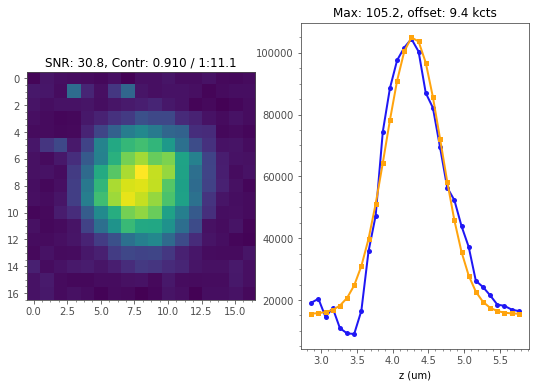

In [39]:
track_image = get_track_image()
track_z_x, track_z_y = get_track_z_line()
fit_z_x, fit_z_y = get_track_z_fit()

track_snr, track_contr, fit_params = get_current_track_2d_snr()
track_z_snr, track_t_contr, fit_z_params = get_current_track_z_snr()
bg_edges = np.average(np.asarray([track_image[0,:],track_image[:,0], track_image[-1,:], track_image[:,-1]]))
_, max_counts = get_track_z_fit(at_pos=fit_z_params['center'])
offset_counts = fit_params['offset']

plt.subplot(121)
plt.imshow(track_image)

plt.title(f"SNR: {track_snr:.1f}, Contr: {track_contr:.3f} / 1:{1/(1-track_contr):.1f}")
plt.subplot(122)
plt.plot(track_z_x*1e6, track_z_y)
plt.plot(fit_z_x*1e6, fit_z_y)
plt.title(f"Max: {max_counts/1e3:.1f}, offset: {offset_counts/1e3:.1f} kcts")
plt.xlabel("z (um)")

plt.show()

print(f"{fit_params}")


In [15]:
fit_z_params

{'slope': -1168319513675.2844, 'offset': 1168319539437.1528, 'center': 4.171212585466867e-06, 'sigma': 4.4915310324810326e-07, 'amplitude': 125200.5773878474}

### Optimize for t_init=const

In [11]:
laser_strob(t_init=1.0e-6, t_read=0.5e-6)
optimize_position(optimize_ch='')

8.038103342056274

In [357]:
ts_read = np.linspace(0.5e-6, 3e-6, 15)
t_init = 1e-6
conf_snr = []
conf_contr = []
conf_img = []
conf_signal = []

for i, t in enumerate(ts_read):
    if uglobals.abort.is_set():
        break
    
    logger.info(f"[{i+1}/{len(ts_read)}]: t_read= {t}")
    poi_nv = poimanagerlogic.poi_names[-1]
    poimanagerlogic.go_to_poi(poi_nv)
    
    laser_strob(t_init=t_init, t_read=t)
    optimize_position(optimize_ch='')
    track_snr, track_contr, fit_params = get_current_track_2d_snr()

    signal, contr = get_2d_signal_contr(fit_params)
    
    conf_img.append(get_track_image()) 
    conf_snr.append(track_snr)
    conf_contr.append(track_contr)
    conf_signal.append(signal)

In [335]:
optimizerlogic._clock_frequency*np.asarray(conf_signal)/1e3

array([ 5.57809902,  7.99785501,  8.77768061, 10.09541004, 10.18451482,
       10.7352353 , 10.57014428, 11.40119514, 11.68055128, 11.8680301 ,
       14.43970573, 12.26191462, 10.80907157, 10.21018922, 10.5328523 ])

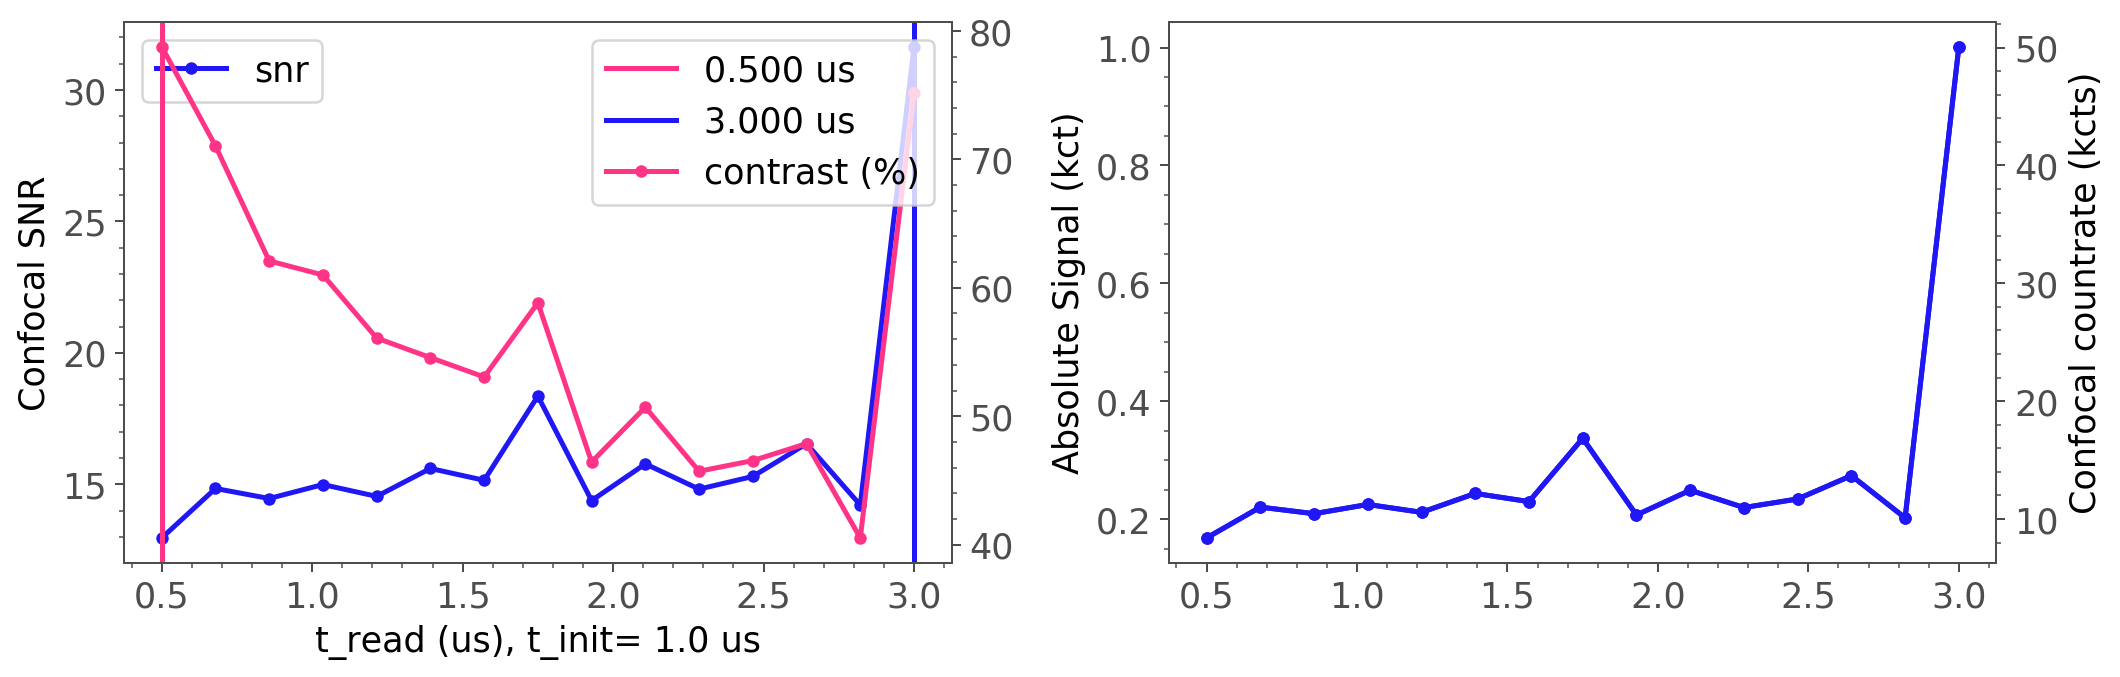

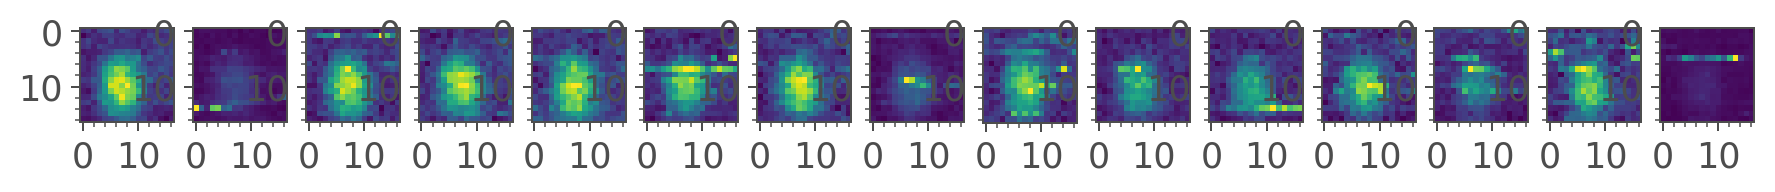

In [361]:
contr_best = np.argmax(conf_contr)
t_max_contr = ts_read[np.argmax(conf_contr)]
t_max_snr = ts_read[np.argmax(conf_snr)]


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(np.asarray(ts_read)*1e6, conf_snr, label="snr")

plt.legend(loc=2)

plt.ylabel("Confocal SNR")
plt.xlabel(f"t_read (us), t_init= {t_init*1e6:.1f} us")


ax2 = plt.twinx()
plt.axvline(t_max_contr*1e6, label=f"{t_max_contr*1e6:.3f} us", color="C2")
plt.axvline(t_max_snr*1e6, label=f"{t_max_snr*1e6:.3f} us", color="C0")
ax2.plot(np.asarray(ts_read)*1e6, 100*np.asarray(conf_contr), label="contrast (%)", color="C2")
#ax2.set_ylim([50,100])

ax2.legend(loc=1)

plt.subplot(122)
plt.plot(np.asarray(ts_read)*1e6, np.asarray(conf_signal)/1e3)
plt.ylabel("Absolute Signal (kct)")
ax2 = plt.twinx()
ax2.plot(np.asarray(ts_read)*1e6, optimizerlogic._clock_frequency*np.asarray(conf_signal)/1e3)
plt.ylabel("Confocal countrate (kcts)")
plt.xlabel(f"t_read (us), t_init= {t_init*1e6:.1f} us")

plt.tight_layout()
plt.show()

plt.figure()
for i, img in enumerate(conf_img):
    plt.subplot(1,len(conf_img),i+1)
    plt.imshow(img)

plt.show()

### Optimize for t_read=const

In [ ]:
laser_strob(t_init=1e-6, t_read=2e-6)

In [309]:
ts_init = np.linspace(10e-6, 0.5e-6, 10)
t_read = 1.5e-6
conf_snr = []
conf_contr = []
conf_img = []
conf_signal = []

uglobals.abort.clear()
for t in ts_init:
    if uglobals.abort.is_set():
        break
        
    poi_nv = poimanagerlogic.poi_names[-1]
    poimanagerlogic.go_to_poi(poi_nv)
    
    laser_strob(t_init=t, t_read=t_read)
    optimize_position(optimize_ch='')
    track_snr, track_contr, fit_params = get_current_track_2d_snr()
    
    signal, _ = get_2d_signal_contr(fit_params)
    
    conf_signal.append(signal)
    conf_img.append(get_track_image()) 
    conf_snr.append(track_snr)
    conf_contr.append(track_contr)

[{"varName": "awg8190", "varType": "AWGM8190A", "varSize": "144", "varShape": "", "varContent": "<hardware.awg.keysight_m819x.AWGM8190A object at 0x0000006AC57B2D38>"}, {"varName": "config", "varType": "OrderedDict", "varSize": "464", "varShape": "", "varContent": "OrderedDict([('hardware', OrderedDict([('dummysmiq', OrderedDict([('module.Class', 'microwave.mw_source_dummy.MicrowaveDummy'), ('gpib_address', 'dummy'), ('gpib_timeout', 20), ('mock', True)])), ('sm"}, {"varName": "confocalgui", "varType": "ConfocalGui", "varSize": "144", "varShape": "", "varContent": "<gui.confocal.confocalgui.ConfocalGui object at 0x0000006AC25AC4C8>"}, {"varName": "countergui", "varType": "CounterGui", "varSize": "144", "varShape": "", "varContent": "<gui.counter.countergui.CounterGui object at 0x0000006AC213B318>"}, {"varName": "counterlogic", "varType": "CounterLogic", "varSize": "144", "varShape": "", "varContent": "<logic.counter_logic.CounterLogic object at 0x0000006AC212EF78>"}, {"varName": "dummy

In [81]:
#track_contr

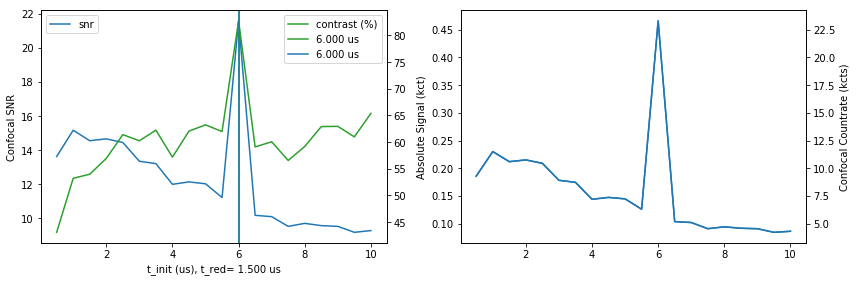

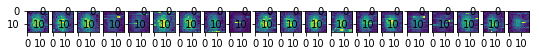

In [235]:
contr_best = np.argmax(conf_contr)
t_max_contr = ts_init[np.argmax(conf_contr)]
t_max_snr = ts_init[np.argmax(conf_snr)]

plt.figure(figsize=(12,4))
plt.subplot(121)

plt.plot(np.asarray(ts_init)*1e6, conf_snr, label="snr")

plt.legend(loc=2)
plt.ylabel("Confocal SNR")
plt.xlabel(f"t_init (us), t_red= {t_read*1e6:.3f} us")

ax2 = plt.twinx()
ax2.plot(np.asarray(ts_init)*1e6, 100*np.asarray(conf_contr), label="contrast (%)", color="C2")
plt.axvline(t_max_contr*1e6, label=f"{t_max_contr*1e6:.3f} us", color="C2")
plt.axvline(t_max_snr*1e6, label=f"{t_max_snr*1e6:.3f} us", color="C0")
ax2.legend(loc=1)

plt.subplot(122)
plt.plot(np.asarray(ts_init)*1e6, np.asarray(conf_signal)/1e3)
plt.ylabel("Absolute Signal (kct)")
ax2 = plt.twinx()
ax2.plot(np.asarray(ts_init)*1e6, optimizerlogic._clock_frequency*np.asarray(conf_signal)/1e3)
plt.ylabel("Confocal Countrate (kcts)")
plt.xlabel(f"t_init (us), t_red= {t_read*1e6:.3f} us")

plt.tight_layout()

plt.show()

plt.figure()
for i, img in enumerate(conf_img):
    plt.subplot(1,len(conf_img),i+1)
    plt.imshow(img)

plt.show()

In [269]:
laser_strob(t_init=2e-6, t_read=1.5e-6)

In [35]:
laser_strob(t_init=1e-6, t_read=400e-9)
optimize_position()
track_snr, track_contr, fit_params = get_current_track_2d_snr()
track_contr

0.9113819890644922

### 2d Optimize t_read, t_init

Uses the laser_strob method and tracking on a single NV to optimize parameters. Make sure that 2d track range is wide enough to obtain good values from the fit for background / offset.

In [509]:
ts_read = np.linspace(0.5e-6, 4e-6, 14)
ts_init = np.linspace(0.5e-6, 5e-6, 14)
conf_snr = []
conf_contr = []
conf_img = []
conf_signal = []

uglobals.abort.clear()

i = 0
for t_i in ts_init:
    if uglobals.abort.is_set():
        break
    for t_r in ts_read:
        if uglobals.abort.is_set():
            break
        try:
            logger.info(f"[{i+1}/{len(ts_read)*len(ts_init)}]: t_intt= {t_i*1e6:.2f} us, t_read= {t_r*1e6:.2f} us")
            poi_nv = poimanagerlogic.poi_names[-1]
            poimanagerlogic.go_to_poi(poi_nv)
               
            laser_strob(t_init=t_i, t_read=t_r)
            optimize_position(optimize_ch='')
            track_snr, track_contr, fit_params = get_current_track_2d_snr()
            signal, contr = get_2d_signal_contr(fit_params)
            signal_abs = get_2d_signal_countrate(fit_params)
            img = get_track_image()
        except Exception as e:
            track_snr, track_contr, signal_abs = -1, -1, -1
            img = []
            logger.error(f"{str(e)}")
        conf_img.append(img) 
        conf_snr.append(track_snr)
        conf_contr.append(track_contr)
        conf_signal.append(signal_abs)
        i += 1
        


In [669]:
conf_snr_2d.shape

(14, 14)

In [697]:
conf_contr_2d = np.reshape(np.pad(np.asarray(conf_contr), (0, len(ts_read)* len(ts_init)-len(conf_contr)), mode='constant'), (len(ts_read), len(ts_init)))
conf_snr_2d = np.reshape(np.pad(np.asarray(conf_snr), (0, len(ts_read)* len(ts_init)-len(conf_snr)), mode='constant'),(len(ts_read), len(ts_init)))
conf_signal_2d = np.reshape(np.pad(np.asarray(conf_signal), (0, len(ts_read)* len(ts_init)-len(conf_signal)), mode='constant'),(len(ts_read), len(ts_init)))

xy_fit_data = conf_snr_2d.flatten()

fit_x, fit_y = np.meshgrid(ts_init, ts_read)
axes = np.empty((len(ts_init) * len(ts_read), 2))
axes = (fit_x.flatten(), fit_y.flatten())
result_2D_gaus = optimizerlogic._fit_logic.make_twoDgaussian_fit(
    xy_axes=axes,
    data=xy_fit_data,
    estimator=optimizerlogic._fit_logic.estimate_twoDgaussian_MLE
)


fit_params = result_2D_gaus.best_values
fit_params



{'amplitude': 104.88754891828957, 'center_x': 2.8524379614873675e-06, 'center_y': 2.1894392589889813e-06, 'sigma_x': 1.4999991785941968e-06, 'sigma_y': 1.1666660344858924e-06, 'theta': 2.4894770248908498, 'offset': 0.9904977144037375}

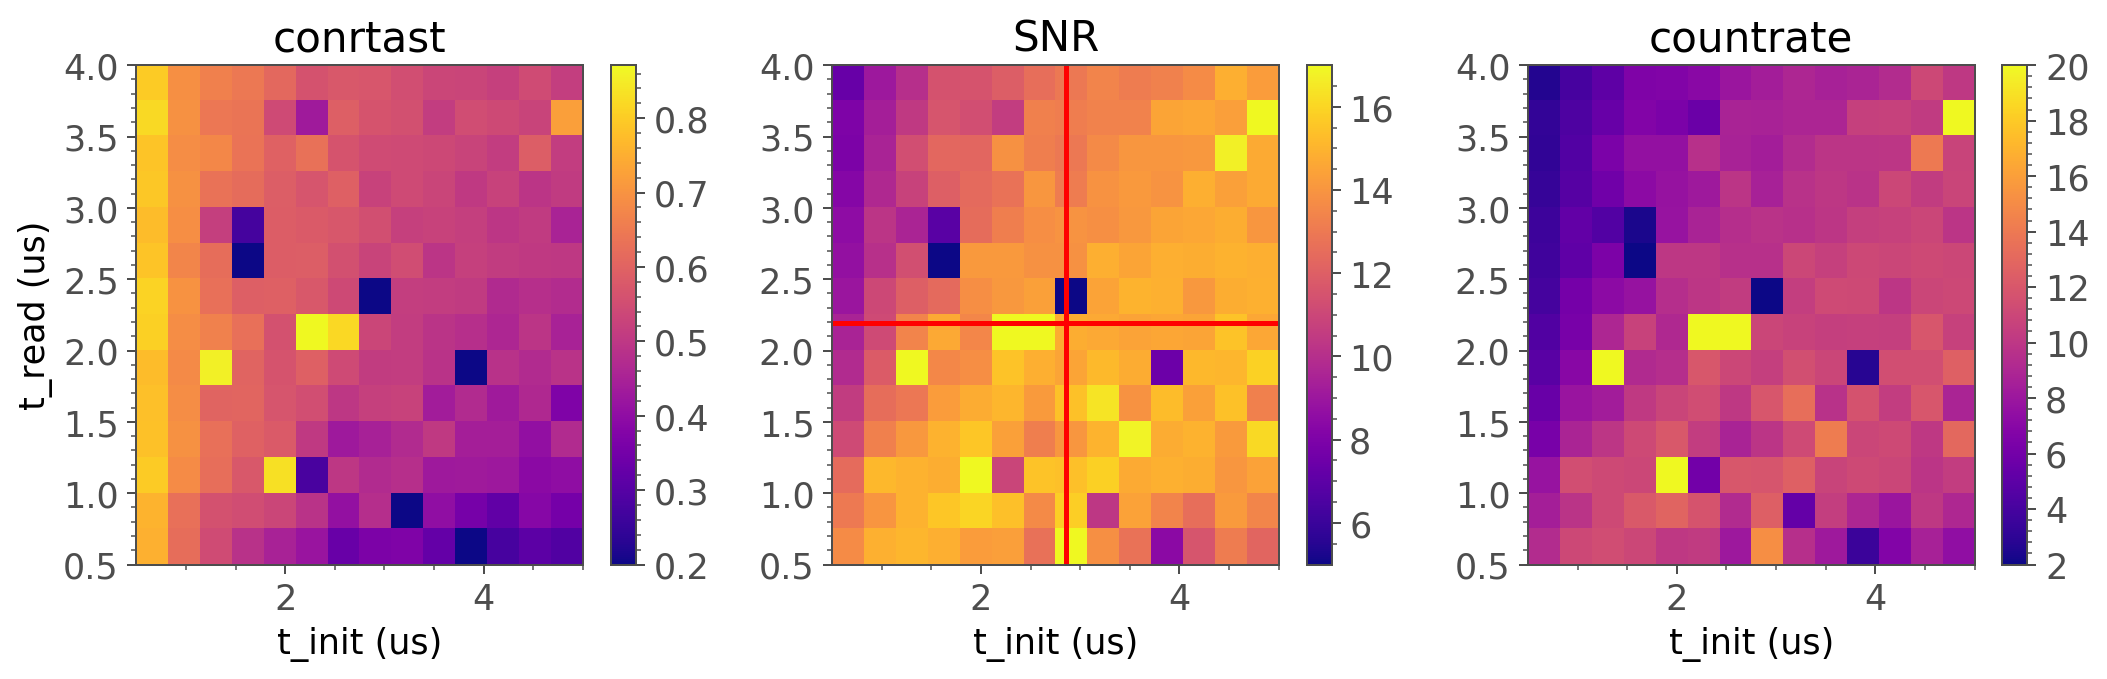

In [841]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.imshow(conf_contr_2d, extent=[ts_init[0]*1e6, 1e6*ts_init[-1],
                            ts_read[0]*1e6, 1e6*ts_read[-1]],
                            cmap='plasma', aspect='auto', origin='lower', vmin=0.2)

plt.title("conrtast")
plt.xlabel("t_init (us)")
plt.ylabel("t_read (us)")
plt.colorbar()

plt.subplot(132)
plt.imshow(conf_snr_2d, extent=[ts_init[0]*1e6, 1e6*ts_init[-1],
                            ts_read[0]*1e6, 1e6*ts_read[-1]],
                            cmap='plasma', aspect='auto', origin='lower', vmin=5, vmax=17)
plt.title("SNR")
plt.xlabel("t_init (us)")
plt.axvline(fit_params['center_x']*1e6, color='r', lw=2)
plt.axhline(fit_params['center_y']*1e6, color='r', lw=2)
plt.colorbar()

plt.subplot(133)
plt.imshow(conf_signal_2d/1e3, extent=[ts_init[0]*1e6, 1e6*ts_init[-1],
                            ts_read[0]*1e6, 1e6*ts_read[-1]],
                            cmap='plasma', aspect='auto', origin='lower', vmin=2, vmax=20)
plt.title("countrate")
plt.xlabel("t_init (us)")



plt.colorbar()
plt.tight_layout()



plt.show()

print(f"{fit_params}")


#### Save

In [831]:
fname = "confocal_track_550+638_opt_init_read"
savepath = "E:/Data/2021/03/20210319/"

In [833]:
if savepath is not None:
    
    t_max_snr = 1e6*np.asarray([fit_params['center_x'], fit_params['center_y']])
    
    header = "for best SNR: t_init/ t_read (us)= {} \n".format(t_max_snr)
    header += "x: t_init (s), : t_read (s), z: contr, z: SNR, z: countrate, fit_params"
    header += "fit_params: {}".format(fit_params)
    np.savez(savepath + "\\" +fname, t_i=ts_init, t_r=ts_read,
             contr=conf_contr_2d, snr=conf_snr_2d, countrate=conf_signal_2d, header=header)
    
    print("Saving to: {}".format(savepath + "/" +fname))

In [755]:
fit_params

{'amplitude': 104.88754891828957, 'center_x': 2.8524379614873675e-06, 'center_y': 2.1894392589889813e-06, 'sigma_x': 1.4999991785941968e-06, 'sigma_y': 1.1666660344858924e-06, 'theta': 2.4894770248908498, 'offset': 0.9904977144037375}